# Simulation

## Simulate the Pheno-type data

### 1. Choose $n = 20$ genes

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
print(os.getcwd())
print(os.listdir('./data'))
file = 'data/SNP_in_200GENE_chr1.csv'
data = pd.read_csv(file, error_bad_lines=False)


e:\OneDrive\Programming\Python\CVc_in_bio_informatics
['Chr1First2000.vcf', 'filtered_test.vcf', 'selected_genes.csv', 'Simulated_SNPs.csv', 'SNP_in_200GENE_chr1.csv', 'SNP_in_20GENE_chr1.csv', 'testData.csv']


C:\Users\Archibald\AppData\Local\Temp\ipykernel_130464\2278546344.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file, error_bad_lines=False)


In [3]:
print(data.shape)
data.head()

(10297, 2550)


,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,ENSG00000227634,8269039,2,2,1,2,2,1,1,2,...,1,2,1,2,1,2,2,1,2,1
1,ENSG00000227634,8269341,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000227634,8269373,2,2,1,2,2,1,1,2,...,1,2,1,2,1,2,2,1,2,1
3,ENSG00000227634,8269650,2,2,1,2,2,1,1,2,...,1,2,1,1,1,2,2,1,2,1
4,ENSG00000227634,8269712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data['gene'] = data.GENE.astype('category')
data.head()

,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,gene
0,ENSG00000227634,8269039,2,2,1,2,2,1,1,2,...,2,1,2,1,2,2,1,2,1,ENSG00000227634
1,ENSG00000227634,8269341,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000227634
2,ENSG00000227634,8269373,2,2,1,2,2,1,1,2,...,2,1,2,1,2,2,1,2,1,ENSG00000227634
3,ENSG00000227634,8269650,2,2,1,2,2,1,1,2,...,2,1,1,1,2,2,1,2,1,ENSG00000227634
4,ENSG00000227634,8269712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000227634


In [6]:
data.groupby('gene').GENE.unique().sort_values()

gene
ENSG00000001461    [ENSG00000001461]
ENSG00000018625    [ENSG00000018625]
ENSG00000084070    [ENSG00000084070]
ENSG00000084072    [ENSG00000084072]
ENSG00000116147    [ENSG00000116147]
                         ...        
ENSG00000268172    [ENSG00000268172]
ENSG00000271647    [ENSG00000271647]
ENSG00000271810    [ENSG00000271810]
ENSG00000272084    [ENSG00000272084]
ENSG00000273002    [ENSG00000273002]
Name: GENE, Length: 136, dtype: object

In [7]:
# Selecting 20 Genes that have more than 100 SNPs
n = 20
counts = data.groupby('gene').size().sort_values(ascending=False) 
groups = counts[counts > 100].sample(n, replace = False, random_state = 1 ).index

print(groups)

CategoricalIndex(['ENSG00000116704', 'ENSG00000162378', 'ENSG00000162374',
                  'ENSG00000168710', 'ENSG00000121644', 'ENSG00000116353',
                  'ENSG00000237413', 'ENSG00000143190', 'ENSG00000203739',
                  'ENSG00000134198', 'ENSG00000153207', 'ENSG00000229956',
                  'ENSG00000198198', 'ENSG00000172380', 'ENSG00000143702',
                  'ENSG00000225006', 'ENSG00000117461', 'ENSG00000117602',
                  'ENSG00000143344', 'ENSG00000162688'],
                 categories=['ENSG00000001461', 'ENSG00000018625', 'ENSG00000084070', 'ENSG00000084072', 'ENSG00000116147', 'ENSG00000116353', 'ENSG00000116497', 'ENSG00000116704', ...], ordered=False, dtype='category', name='gene')


In [8]:
index = [i for i,x in enumerate(data['gene']) if x in groups]
data_selected = data.iloc[index, :]
print(len(data_selected))
data_selected.head()

5443


,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,gene
331,ENSG00000117602,24830297,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,ENSG00000117602
332,ENSG00000117602,24831517,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,ENSG00000117602
333,ENSG00000117602,24832009,2,2,1,0,1,2,2,1,...,1,2,2,0,2,2,1,0,0,ENSG00000117602
334,ENSG00000117602,24835018,2,2,1,2,2,1,1,1,...,2,1,2,2,2,2,2,2,2,ENSG00000117602
335,ENSG00000117602,24835171,0,0,1,2,1,0,0,1,...,1,0,0,2,0,0,1,2,2,ENSG00000117602


In [9]:
data_selected.shape

(5443, 2551)

In [10]:
# get the group names
gene_names = list(data_selected.gene.unique())

data_selected['sign'] = 0

# Choose five SNPs as significant SNPs and 95 as small sigficance others are non-significant
for gene in gene_names:
    n = len(data_selected.loc[data_selected['gene'] == gene ,:])
    sign =  [1] * 100  + [0] * (n - 100)
    
    data_selected.loc[data_selected['gene'] == gene ,'sign'] = sign

C:\Users\Archibald\AppData\Local\Temp\ipykernel_130464\486112115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['sign'] = 0


In [11]:
d = 5
data_selected = data_selected.loc[data_selected['sign'] != 0,:]
data_selected['sign'][:d] = 2
data_selected.shape

C:\Users\Archibald\AppData\Local\Temp\ipykernel_130464\1514404415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['sign'][:d] = 2


(2000, 2552)

In [12]:
data_selected['sign'].head()

331    2
332    2
333    2
334    2
335    2
Name: sign, dtype: int64

### Get Beta

In [13]:
# Get Beta
np.random.seed(0)
data_selected['beta'] = 0
n = len(data_selected.loc[data_selected['sign'] == 2,'beta'])
print(n)
large_effect = 200
data_selected.loc[data_selected['sign'] == 2,'beta'] = np.random.normal(0, np.sqrt(large_effect), n)

n = len(data_selected.loc[data_selected['sign'] == 1,'beta'])
print(n)
small_effect = 3
data_selected.loc[data_selected['sign'] == 1,'beta'] = np.random.normal(0, np.sqrt(small_effect), n)

beta = data_selected.beta
print(beta[:10])
beta.shape

5
1995
331    24.947468
332     5.659078
333    13.841445
334    31.691016
335    26.411258
336    -1.692695
337     1.645601
338    -0.262158
339    -0.178780
340     0.711177
Name: beta, dtype: float64


(2000,)

In [14]:
from  sklearn.preprocessing import StandardScaler 
SNP = data_selected.drop(['GENE', 'POS', 'gene', 'beta'], axis=1).T
# ss = StandardScaler()
# SNP.loc[:,:] = ss.fit_teansform(X = SNP.loc[:,:])

SNP.head()


,331,332,333,334,335,336,337,338,339,340,...,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972
HG00096,2,2,2,2,0,0,2,0,2,0,...,1,1,1,0,1,0,1,0,0,0
HG00097,2,2,2,2,0,0,2,0,2,0,...,1,1,1,0,1,0,1,0,0,0
HG00099,2,2,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
HG00100,2,2,0,2,2,0,0,2,0,2,...,1,1,1,0,1,0,1,0,0,0
HG00101,2,2,1,2,1,0,1,1,1,1,...,1,1,1,0,1,0,1,0,0,0


In [15]:
SNP1 = SNP.copy()

In [16]:
temp = SNP1.values @ beta
print(temp.shape)
sigma_g2 = np.var(temp, ddof = 1) # get the overall variance
h2 = 0.5 # heritability
sigma_e2 = sigma_g2 * (1 - h2)/ h2
print("The sigma_g^2 is {:.5}, and sigma_e^2 is {:.5}".format(sigma_g2, sigma_e2))

(2549,)
The sigma_g^2 is 2609.2, and sigma_e^2 is 2609.2


Add bias term

In [32]:
np.random.seed(1)
beta0 = np.random.normal(0, np.sqrt(large_effect))
print(beta0)
print(beta.shape)
# beta_ = np.append(beta, beta0)
beta_ = np.insert(beta.values, 0, beta0)
print(beta_[:6])

22.971712432704138
(2000,)
[22.97171243 24.94746752  5.65907751 13.84144531 31.69101554 26.41125838]


In [33]:
SNP.insert(loc=0, column='bias', value=1)

In [34]:
residual = np.random.normal(0, np.sqrt(sigma_e2), len(SNP))
print(SNP.values.shape)
print(beta_.shape)
SNP['Y'] = SNP1.values @ beta + residual + beta0

(2549, 2001)
(2001,)


In [37]:
print(np.var(residual), np.var(SNP1.values @ beta), np.var(beta0))

2621.7283570707173 2608.213410736963 0.0


In [35]:
np.var(SNP['Y'])

5017.581743311149

In [110]:
SNP.head()

,bias,331,332,333,334,335,336,337,338,339,...,9964,9965,9966,9967,9968,9969,9970,9971,9972,Y
HG00096,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,89.377100
HG00097,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,97.792189
HG00099,1,2,2,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,7.652598
HG00100,1,2,2,0,2,2,0,0,2,0,...,1,1,0,1,0,1,0,0,0,121.151941
HG00101,1,2,2,1,2,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,-18.198573


In [115]:
# Save Simulated Parameters and data
SNP.to_csv('data/Simulated_SNPs.csv')
np.savez('Parameters/simulated_parameters.npz', sigma_e2 =sigma_e2,sigma_g2 =sigma_g2, h2 = h2, beta = beta_, large_effect_terms = d)

## Working with K-folds

In [49]:
def get_folds_indices(nfolds, n_tr):
    if nfolds <= n_tr:
        fold_size = int(np.floor(n_tr/nfolds))
        resi = n_tr % nfolds
        fold_sizes = [0] + resi * [fold_size +1] + (nfolds - resi) * [fold_size]
        indices = np.cumsum(fold_sizes)
        folds_indices = [(indices[i], indices[i + 1])  for i in range(nfolds)]

    else:
        raise Exception("Number of folds is larger than numer of samples")
    print('First 5 fold indices : {}'.format(folds_indices[:5]))
    return folds_indices
    
def getHcv_for_Kfolds(X_tr, y_tr,  H_function, V = None, nfolds = 10):
    n_tr,p = X_tr.shape
    Hcv_k = np.zeros([n_tr,n_tr])
    
    folds_indices = get_folds_indices(nfolds = nfolds, n_tr = n_tr)
    for Kindices in folds_indices:
        ia,ib = Kindices
        indices_minus_K = list(range(0, ia)) + list(range(ib, n_tr))

        X_minus_K = X_tr[indices_minus_K,:]
        y_minus_K = y_tr[indices_minus_K]
        X_k = X_tr[ia:ib,:]
        y_K = y_tr[ia:ib]

        if V is not None:
            V_minus_k = V[indices_minus_K,:][:, indices_minus_K]
            temp = H_function(X_minus_K, X_k , y_minus_K, y_K, V_minus_k)
        else:
            temp = H_function(X_minus_K, X_k , y_minus_K, y_K)

        Hcv_k[ia:ib, indices_minus_K] = temp

    return Hcv_k

In [50]:
import time
import functools

def timing(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        print('--- start function ' + func.__name__, '---')
        result = func(*args, **kwargs)
        print('------ {:.4f} seconds -----'.format(time.time() - start_time))
        return result

    return wrapper

## Model Test

### 1. LMM (linear mixed model)
Let the model be
$$
Y_i = \sum_{j = 1}^{p} \beta_j X_{i,j} + u_i +\epsilon_i \ \text{where } i = 1, 2,3,\dots,n
$$
where $(u_1, u_2, \dots, u_n)^\top \sim MVN(0, \sigma_g^2 K ) $ and $\epsilon_i \sim ^{i.i.d} N(0, \sigma_e^2)$, and  $K = 1/p X X^\top$, $\sigma_e^2 = \frac{1 - h^2}{h^2} \sigma_g^2$ . 

> ? how to estimate $\sigma_e \text{ and } \sigma_g$?  Maybe using REML? But it requires the indication of the clusters.

We can write the model as 
$$
Y_i = \sum_{j = 1}^{p} \beta_j X_{i,j} + \epsilon_i^* \ \text{where } i = 1, 2,3,\dots,n \text{ and } \boldsymbol{\epsilon}^{*} = \boldsymbol u + \boldsymbol \epsilon \sim N_{n}(\mathbf{0}, V)
$$
where $V = Var(Y|X\beta) = \sigma^2_g K + \sigma^2_e I$

So we need to estimate two of  $\sigma_g, \sigma_e \text{or } h$

so we can get estimate for $\tilde{\boldsymbol{\beta}}:=\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} \boldsymbol{Y}$

BLUP for $\tilde u = E(u|Y) = \sigma^2_g K V^{-1}(Y - X\tilde \beta)$

 And $\hat Y = X \tilde \beta + \tilde u$

Now we can define $H$ by

$H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} + \sigma^2_g K V^{-1}(I - X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1})$


$$
\widehat{C V}_{c}=\frac{1}{n}\left(\boldsymbol{y}-H_{c v} \boldsymbol{y}\right)^{t}\left(\boldsymbol{y}-H_{c v} \boldsymbol{y}\right)+\frac{2}{n}\left[\operatorname{tr}\left(H_{c v} \operatorname{Cov}(\boldsymbol{y}, \boldsymbol{y})\right)-n \boldsymbol{h}_{t e} \operatorname{Cov}\left(\boldsymbol{y}_{t r}, y_{t e}\right)\right]
$$

Get $V = Var(Y|X\beta) = \sigma^2_g K + \sigma^2_e I$ where $K = 1/p X X^\top$

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())
%matplotlib inline
if not 'SNP' in locals():
    SNP = pd.read_csv('../../data/Simulated_SNPs.csv', index_col=0)
par = np.load('../../Parameters/simulated_parameters.npz')
sigma_e2, sigma_g2, h2, beta, num_large_effet_terms = [par[params] for params in par.files]
sigma_g2 = float(sigma_g2)
sigma_e2 = float(sigma_e2)
h2 = float(h2)
SNP.head()

e:\OneDrive\Programming\Python\CVc_in_bio_informatics\src\frequentist_simulation


,bias,331,332,333,334,335,336,337,338,339,...,9964,9965,9966,9967,9968,9969,9970,9971,9972,Y
HG00096,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,89.377100
HG00097,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,97.792189
HG00099,1,2,2,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,7.652598
HG00100,1,2,2,0,2,2,0,0,2,0,...,1,1,0,1,0,1,0,0,0,121.151941
HG00101,1,2,2,1,2,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,-18.198573


In [4]:
beta[:num_large_effet_terms+1]

array([22.97171243, 24.94746752,  5.65907751, 13.84144531, 31.69101554,
       26.41125838])

In [5]:
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()
# y = scaler.fit_transform(SNP['Y'].to_numpy().reshape([-1,1]))
y = SNP['Y'].to_numpy()
y = y.reshape(-1,1)


In [6]:
from sklearn.model_selection import train_test_split
SNP_ = SNP.copy()
SNP_.drop('Y', inplace= True, axis = 1)
data = SNP_.values
G_tr, G_te, y_tr, y_te = train_test_split(data, y, test_size = 0.2, random_state = 123)

# X_tr, X_te = G_tr[:, :num_large_effet_terms+1], G_te[:, :num_large_effet_terms+1]
d = 100
X_tr, X_te = G_tr[:, :d+1], G_te[:, :d +1]
W_tr, W_te = G_tr[:, 1:], G_te[:, 1:]

In [7]:
print(y_tr.shape, X_tr.shape, W_tr.shape, y_te.shape, X_te.shape, W_te.shape)

(2039, 1) (2039, 101) (2039, 2000) (510, 1) (510, 101) (510, 2000)


#### Using FAST_LMM to estimate sigma_g2 and sigma_e2

In [8]:
%load_ext autoreload
%autoreload 2

In [14]:
# from FAST_LMM import utils as u
sc = W_tr.shape[1]
import sys
sys.path.append('./../')
from FAST_LMM import FASTLMM
fast = FASTLMM(lowRank=True, REML = False)
fast.fit(X_tr, y_tr, 1/np.sqrt(sc) * W_tr)

------------- FAST-LMM------------------
LowRank is set as True, not using REML
Rank of W is 1673, shape of W is (2039, 2000).
--- 3.5709967613220215 seconds for SVD calculation ---
Optimization Results:
Delta is calculated as:  0.6387510565869324
Maximum Likelihood is calculated as:  -11015.473992664456
---------------Summary------------------
LowRank is set as True, not using REML
Heritability h2: 0.6102208117459431
Sigma_g2: 3919.844336556006
Sigma_e2: 2503.804711631452
------ 58.35671782493591 seconds ------


In [15]:
print(fast.sigma_e2 + fast.sigma_g2)
print(np.var(y_tr), np.var(y_te), np.var(np.concatenate([y_tr, y_te])))

6423.649048187458
4916.9842717438105 5410.652842964886 5017.581743311135


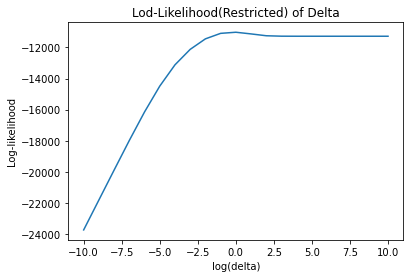

In [16]:
fast.plot_likelihood()

In [17]:
#using theoreatical sigma
# fast.sigma_e2 = sigma_e2
# fast.sigma_g2 = sigma_g2

print('h2 = ', 1/(1+fast.delta) )
n, sc = W_tr.shape
# varYhat = np.mean(np.diag(1/ sc * sigma_g2* W_tr @ W_tr.T + sigma_e2 * np.identity(n)))
varYhat2 = np.mean(np.diag(1/ sc * fast.sigma_g2* W_tr @ W_tr.T + fast.sigma_e2 * np.identity(n)))
# varY = np.var(y_tr - X_tr @ beta[ :num_large_effet_terms+1], ddof = 0)
varY_minus_Xbeta = np.var(y_tr - X_tr @ fast.beta)
print(varYhat2 , varY_minus_Xbeta)

h2 =  0.6102208117459431
6752.3536603108205 3876.4195753858376


In [18]:
n_te, sc_te = W_te.shape
y_te_hat = fast.predict(X_te,  1/np.sqrt(sc_te)* W_te)
y_tr_hat = fast.predict(X_tr, 1/np.sqrt(sc)* W_tr)

In [19]:
y_tr_hat_wls = X_tr @ fast.beta
y_te_hat_wls = X_te @ fast.beta

In [20]:
y_tr_hat.shape

(2039, 1)

In [21]:
tr_error = 1/n * (np.sum(np.square(y_tr_hat - y_tr)))
te_error = 1/n_te * (np.sum(np.square(y_te_hat - y_te)))
tr_error_wls = 1/n * (np.sum(np.square(y_tr_hat_wls - y_tr)))
te_error_wls = 1/n_te * (np.sum(np.square(y_te_hat_wls - y_te)))
print('LMM: training error is:', tr_error, ' test error is:', te_error)
print('WLS: training error is:', tr_error_wls, ' test error is:', te_error_wls)


LMM: training error is: 2305.494186011934  test error is: 3300.2165195903485
WLS: training error is: 4847.516316957407  test error is: 5855.715343084603


#### Comparison of training and test error of using LMM, OLS, WLS
First we calculate $H_{tr, LMM}$, which is $H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} + \sigma^2_g K V^{-1}(I - X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1})$

Then we calculate $H_{tr, WLS}$, which is $H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1}$.

Finally we calculate $H_{tr, WLS}$, which is $H = X\left(X^{t} X\right)^{-1} X^{t}$.

In [22]:
from FAST_LMM import utils as u
n_tr,sc = W_tr.shape
V_inv = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(X_tr.shape[0])
inverse_part = u.inv(X_tr.T @ fast.V_inv() @ X_tr)

K = W_tr @ W_tr.T /sc
H_wls = X_tr @ inverse_part @ X_tr.T @ fast.V_inv()
add2 = sigma_g2 * K @ fast.V_inv() @ (np.identity(n_tr) - H_wls)
H_lmm = H_wls + add2
H_ols = X_tr @ u.inv(X_tr.T @ X_tr)@ X_tr.T

In [23]:
y_tr_hat_lmm = H_lmm @ y_tr
y_tr_hat_wls = H_wls @ y_tr
y_tr_hat_ols = H_ols @ y_tr 


tr_error_lmm = 1/n_tr * (np.sum((y_tr - y_tr_hat)**2))
tr_error_ols = 1/n_tr * (np.sum((y_tr - y_tr_hat_ols)**2))
tr_error_wls = 1/n_tr * (np.sum((y_tr - y_tr_hat_wls)**2))

print('Training error of lmm is {:.2f}, wls error is {:.2f}, ols error is {:.2f}, sigma_e2 is {:.2f}'.format(
    tr_error_lmm, tr_error_wls, tr_error_ols, fast.sigma_e2))
print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_wls/tr_error_lmm, tr_error_ols/tr_error_lmm))

Training error of lmm is 2305.49, wls error is 4847.52, ols error is 3725.23, sigma_e2 is 2503.80
The ratio is 1.00 : 2.54 : 1.62


In [24]:
n_tr,sc = W_tr.shape
# V = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(X_tr.shape[0])
inverse_part = u.inv(X_tr.T @ fast.V_inv() @ X_tr)

H_wls_te = X_te @ inverse_part @ X_tr.T @ fast.V_inv()
K_te_tr = W_te @ W_tr.T /sc
add2 = sigma_g2 * K_te_tr @ fast.V_inv() @ (np.identity(n_tr) - H_wls)
H_lmm_te = H_wls_te + add2
H_ols_te = X_te @ u.inv(X_tr.T @ X_tr)@ X_tr.T

In [26]:
y_te_hat_lmm = H_lmm_te @ y_tr
y_te_hat_wls = H_wls_te @ y_tr
y_te_hat_ols = H_ols_te @ y_tr

te_error_lmm = 1/n_te * (np.sum((y_te - y_te_hat_lmm)**2))
te_error_ols = 1/n_te * (np.sum((y_te - y_te_hat_ols)**2))
te_error_wls = 1/n_te * (np.sum((y_te - y_te_hat_wls)**2))

print('test error of lmm is {:.2f}, wls error is {:.2f}, ols error is {:.2f}, sigma_e2 is {:.2f}'.format(
    te_error_lmm, te_error_wls, te_error_ols, fast.sigma_e2))
print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_wls/te_error_lmm, te_error_ols/te_error_lmm))

test error of lmm is 3674.59, wls error is 5855.72, ols error is 4635.66, sigma_e2 is 2503.80
The ratio is 1.00 : 1.59 : 1.26


In [27]:
V_tr_te = 1/sc * W_tr @ W_te.T * sigma_g2
w_lmm = 2 *( 1/n_tr * np.trace(H_lmm @ fast.V()) - 1/ n_te * np.trace(H_lmm_te @ V_tr_te))
w_wls = 2 *( 1/n_tr * np.trace(H_wls @ fast.V()) - 1/ n_te * np.trace(H_wls_te @ V_tr_te))
w_ols = 2 *( 1/n_tr * np.trace(H_ols @ fast.V()) - 1/ n_te * np.trace(H_ols_te @ V_tr_te))


tr_error_lmm_c = tr_error_lmm + w_lmm
tr_error_wls_c = tr_error_wls + w_wls
tr_error_ols_c = tr_error_ols + w_ols

print('The training error of     lmm is {}, wls is {}, and ols is {}'.format(tr_error_lmm, tr_error_wls, tr_error_ols))
print('The corrected tr error of lmm is {}, wls is {}, and ols is {}'.format(tr_error_lmm_c, tr_error_wls_c, tr_error_ols_c))
print('The test error of         lmm is {}, wls is {}, and ols is {}'.format(te_error_lmm, te_error_wls, te_error_ols))

The training error of     lmm is 2305.494186011934, wls is 4847.516316957868, and ols is 3725.22532711786
The corrected tr error of lmm is 4947.133536800278, wls is 5968.10252121317, and ols is 6198.813929534688
The test error of         lmm is 3674.58558200125, wls is 5855.715343084947, and ols is 4635.659955401074


#### Leave One out Cross-validation error of LMM WLS and OLS

##### Using theoretical sigma values

In [45]:
# summ = sigma_e2 + sigma_g2
# sigma_e2 = sigma_e2/summ
# sigma_g2 = sigma_g2/summ
print('sigma_e2: ', sigma_e2, ' sigma_g2: ', sigma_g2)

sigma_e2:  2609.2370423738284  sigma_g2:  2609.2370423738284


In [80]:
n_tr,sc = W_tr.shape
V = sigma_g2 / sc * W_tr @ W_tr.T + sigma_e2 * np.identity(n_tr)

H_cv_lmm = np.zeros([n_tr,n_tr])
H_cv_wls = np.zeros([n_tr,n_tr])
H_cv_ols = np.zeros([n_tr,n_tr])

H_cv_temp = np.zeros([n_tr,n_tr-1])
# V_minusi_inv_storage = np.zeros([n_tr,n_tr-1,n_tr-1]) 
# Store the inverse of Variance to reduce time consumpution 
# Storge comsumption will be too large

for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    V_minusi_inv = u.inv(V[indices_mi,:][:,indices_mi]) 
    X_minusi = X_tr[indices_mi, :]

    inverse1 = u.inv(X_minusi.T @ V_minusi_inv @ X_minusi)
    inverse2 = u.inv(X_minusi.T @  X_minusi)

    beta_temp = inverse1 @ X_minusi.T @ V_minusi_inv
    temp = X_tr[i,:] @ beta_temp
    # H_cv_temp[i, ] = temp
    H_cv_temp = X_minusi @ beta_temp

    H_cv_wls[i, indices_mi] = temp
    H_cv_lmm[i, indices_mi] = temp + \
        V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @\
             (np.identity(n_tr - 1) - H_cv_temp)

    H_cv_ols[i, indices_mi] = X_tr[i,:] @ inverse2 @ X_minusi.T 

# for i in range(n_tr):
#     indices_mi= list(range(n_tr))
#     indices_mi.remove(i)
#     H_cv_lmm[i, indices_mi] = H_cv_wls[i, indices_mi] + \
#         V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @ (np.identity(n_tr - 1) - H_cv_temp[indices_mi,: ])

np.savez('Parameters/H_cv LMM.npz', H_cv_ols = H_cv_ols,H_cv_wls = H_cv_wls, H_cv_lmm= H_cv_lmm)


FileNotFoundError: [Errno 2] No such file or directory: 'Parameteres/H_cv LMM.npz'

In [82]:
np.savez('Parameters/H_cv LMM2.npz', H_cv_ols = H_cv_ols,H_cv_wls = H_cv_wls, H_cv_lmm= H_cv_lmm)

In [83]:
fast.summary()

---------------Summary------------------
LowRank is set as True, not using REML
Heritability h2: 0.6191573585757943
Sigma_g2: 0.8501751476287691
Sigma_e2: 0.5229412917597077


In [84]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols @ y_tr)))



V_inv = fast.V_inv()
# using theoretical sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V(sigma_g2 = sigma_g2, sigma_e2 = sigma_e2)
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 0.5724998389488071, wls is 0.801534662456013, and ols is 0.7889778369665089
The CVc error of  lmm is 0.868915702942935, wls is 0.8481441721079157, and ols is 0.7940647601034707
The test error of lmm is 0.6764402864058059, wls is 0.8932609152562827, and ols is 0.8572306437026114


##### Using estimated sigma value

In [46]:
fast.summary()

---------------Summary------------------
LowRank is set as True, not using REML
Heritability h2: 0.6102208117459431
Sigma_g2: 3919.844336556006
Sigma_e2: 2503.804711631452


In [47]:
n_tr,sc = W_tr.shape
V = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(n_tr)

H_cv_lmm2 = np.zeros([n_tr,n_tr])
H_cv_wls2 = np.zeros([n_tr,n_tr])
H_cv_ols2 = np.zeros([n_tr,n_tr])

H_cv_temp = np.zeros([n_tr,n_tr-1])
# V_minusi_inv_storage = np.zeros([n_tr,n_tr-1,n_tr-1]) 
# Store the inverse of Variance to reduce time consumpution 
# Storge comsumption will be too large

for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    V_minusi_inv = u.inv(V[indices_mi,:][:,indices_mi]) 
    X_minusi = X_tr[indices_mi, :]

    inverse1 = u.inv(X_minusi.T @ V_minusi_inv @ X_minusi)
    inverse2 = u.inv(X_minusi.T @  X_minusi)

    beta_temp = inverse1 @ X_minusi.T @ V_minusi_inv
    temp = X_tr[i,:] @ beta_temp
    H_cv_temp = X_minusi @ beta_temp

    H_cv_wls2[i, indices_mi] = temp
    H_cv_lmm2[i, indices_mi] = temp + \
        V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @\
             (np.identity(n_tr - 1) - H_cv_temp)

    H_cv_ols2[i, indices_mi] = X_tr[i,:] @ inverse2 @ X_minusi.T 
#   H_cv_temp[i, ] = temp

# for i in range(n_tr):
#     indices_mi= list(range(n_tr))
#     indices_mi.remove(i)
#     H_cv_lmm[i, indices_mi] = H_cv_wls[i, indices_mi] + \
#         V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @ (np.identity(n_tr - 1) - H_cv_temp[indices_mi,: ])

np.savez('Parameters/H_cv LMM2.npz', H_cv_ols = H_cv_ols2,H_cv_wls = H_cv_wls2, H_cv_lmm= H_cv_lmm2)

Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar Matrix
Singluar

KeyboardInterrupt: 

In [69]:
Hcvs = np.load('Parameters/H_cv LMM2.npz')
H_cv_ols2, H_cv_wls2, H_cv_lmm2 = [Hcvs[params] for params in Hcvs.files]

In [71]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))

print('The CV error of   lmm is {:.4f}, wls is {:.4f}, and ols is {:.4f}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {:.4f}, wls is {:.4f}, and ols is {:.4f}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {:.4f}, wls is {:.4f}, and ols is {:.4f}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 0.5707, wls is 0.8152, and ols is 0.7890
The CVc error of  lmm is 0.5905, wls is 0.8108, and ols is 0.7976
The test error of lmm is 0.6228, wls is 0.8933, and ols is 0.8572


#### Testing with null space of w_tr testing data

In [87]:
from scipy.linalg import null_space
null_V = null_space(W_tr)

In [89]:
W_te_in_null_V = null_V.T
n_te_in_null_V = W_te_in_null_V.shape[0]
X_te_in_null_V = np.concatenate([np.ones([n_te_in_null_V,1]), W_te_in_null_V[:, :num_large_effet_terms]], axis = 1)
np.random.seed(0)
epsilon = np.random.normal(0, np.sqrt(sigma_e2), n_te_in_null_V)
y_te_in_null_V = W_te_in_null_V @ beta[1:]  + beta[0] + epsilon
y_te_in_null_V = scaler.transform(y_te_in_null_V.reshape(-1, 1))

In [90]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te_in_null_V.T

H_te_wls = X_te_in_null_V @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te_in_null_V @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 0.570717391987545, wls is 0.815208575193165, and ols is 0.7889778369665089
The CVc error of  lmm is 2.3238096042522445, wls is 1.3077927355941676, and ols is 2.121293995129623
The test error of lmm is 0.148646106478417, wls is 0.14864610647841697, and ols is 0.11105748282530126


#### Testing with random generated test data

In [91]:
np.random.seed(0)
W_te_random = np.random.choice([0,1,2], [n_te, sc])
X_te_random = np.concatenate([np.ones([n_te,1]), W_te_random[:, :num_large_effet_terms]], axis = 1)
epsilon = np.random.normal(0, np.sqrt(sigma_e2), n_te)
y_te_random = W_te_random@ beta[1:]  + beta[0] + epsilon
y_te_random = scaler.transform(y_te_random.reshape(-1, 1))


In [94]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te_random.T

H_te_wls = X_te_random @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te_random @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te_random - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te_random - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te_random - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 0.570717391987545, wls is 0.815208575193165, and ols is 0.7889778369665089
The CVc error of  lmm is 0.75351097478136, wls is 0.8820716347147919, and ols is 0.9662938448730906
The test error of lmm is 1.197072031836794, wls is 1.3104474383943825, and ols is 1.3572920774488901


In [95]:
y_te_random_hat = X_te_random @ u.inv(X_te_random.T @ X_te_random) @ X_te_random.T @ y_te_random
print(y_te_random_hat.shape)
np.sum(np.square(y_te_random_hat - y_te_random))

(510, 1)


434.8573883516204

#### CV with k folds

In [52]:
@timing
def H_function_ols(X_minus_k, X_k, y_minus_k, y_k ):
    return X_k @ u.inv(X_minus_k.T @ X_minus_k) @ X_minus_k.T

H_cv_ols_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_ols, nfolds = 10 )

First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]
--- start function H_function_ols ---
Singluar Matrix
------ 0.0880 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.1370 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.1280 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0850 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0910 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0770 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.1410 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0870 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0460 seconds -----
--- start function H_function_ols ---
Singluar Matrix
------ 0.0430 seconds -----


In [53]:
@timing
def H_function_wls(X_minus_k, X_k, y_minus_k, y_k, V):
    V_inv = u.inv(V)
    inverse = u.inv(X_minus_k.T @ V_inv @ X_minus_k) 
    return X_k @ inverse @ X_minus_k.T @ V_inv

H_cv_wls_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_wls, fast.V(), nfolds = 10)


First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]
--- start function H_function_wls ---
Singluar Matrix
------ 0.2223 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2080 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2540 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2530 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2721 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2800 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2670 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2930 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.3130 seconds -----
--- start function H_function_wls ---
Singluar Matrix
------ 0.2340 seconds -----


In [54]:
H_cv_lmm_k = np.zeros([n_tr, n_tr])
V_inv = fast.V_inv()
inverse = u.inv (X_tr.T @ V_inv @ X_tr)
H_cv_temp = X_tr @ inverse @ X_tr.T @ V_inv

folds_indices = get_folds_indices(10, n_tr)
# get H_temp
for Kindices in folds_indices:
    ia,ib = Kindices
    indices_minus_K = list(range(0, ia)) + list(range(ib, n_tr))

    V_minus_k = V[indices_minus_K,:][:, indices_minus_K]
    X_k = X_tr[ia:ib,:]
    X_minus_k = X_tr[indices_minus_K,]

    V_inv = u.inv(V_minus_k)

    H_cv_temp = X_minus_k @ inverse @ X_minus_k.T @ V_inv

    # inverse = u.inv(X_minus_k.T @ V_inv @ X_minus_k) 

    # temp =  X_k @ inverse @ X_minus_k.T @ V_inv
    # H_cv_temp.append(temp)
    
    temp_u= V[ia:ib, indices_minus_K] @ u.inv(V_minus_k) @(
        np.identity(n_tr - (ib - ia)) - H_cv_temp #[indices_minus_K,:][:, indices_minus_K]
    )

    H_cv_lmm_k[ia:ib, indices_minus_K] = H_cv_wls_k[ia:ib, indices_minus_K] + temp_u


Singluar Matrix
First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]


In [55]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm_k @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls_k @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols_k @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm_k @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls_k @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols_k @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

Singluar Matrix
Singluar Matrix
Singluar Matrix
The CV error of   lmm is 3087.6077552037914, wls is 5161.92982704929, and ols is 4136.121047804878
The CVc error of  lmm is 3232.9479590357723, wls is 5247.557933760587, and ols is 4170.160725917108
The test error of lmm is 3300.216519590428, wls is 5855.715343084947, and ols is 4635.659955401074


### Ridge


$$
Q(\boldsymbol{\beta})=\frac{1}{n}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})^{\prime}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})+ \lambda ||{\beta}||_2
$$

$$
\hat \beta = \left(X^\top X +n \lambda \mathbf{I} \right)^{-1} X^{\top} Y
$$

So the 
$$
\hat Y = H Y = X \left(X^\top X + n\lambda \mathbf{I} \right)^{-1} X^{\top} Y
$$


##### Training and testing error of Ridge

In [56]:
n_tr,p = X_tr.shape

nlamb = 10
beta_without_y = u.inv(X_tr.T @ X_tr + nlamb * np.identity(p)) @ X_tr.T
beta_hat_ridge = beta_without_y @ y_tr
H_tr_ridge = X_tr @ beta_without_y
H_te_ridge = X_te @ beta_without_y
y_tr_hat_ridge = H_tr_ridge @ y_tr
y_te_hat_ridge = H_te_ridge @ y_tr 

tr_error_ridge = 1/n_tr * np.sum((y_tr-y_tr_hat_ridge) ** 2)
te_error_ridge = 1/n_te * np.sum((y_te-y_te_hat_ridge) ** 2)

Correction_ridge = 2 * (1/n_tr * np.trace(H_tr_ridge @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
tr_error_ridge_c = tr_error_ridge + Correction_lmm
print('training error of ridge is {:.4f}, corrected training error is {:.4f}, test error is {:.4f}'.
    format(tr_error_ridge, tr_error_ridge_c, te_error_ridge))

training error of ridge is 3812.3857, corrected training error is 3957.7259, test error is 4355.1305


##### LOO Cross-valication 

In [139]:
n_tr,p = X_tr.shape
H_cv_ridge = np.zeros([n_tr,n_tr])

lamb = 100 
for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    X_minusi = X_tr[indices_mi, :]
    inverse = u.inv(X_minusi.T @  X_minusi + lamb * np.diag(np.ones(p)) )

    temp = X_tr[i,:] @ inverse @ X_minusi.T  
    H_cv_ridge[i, indices_mi] = temp

np.savez('Parameters/H_cv ridge.npz', H_cv_ridge = H_cv_ridge)

In [142]:
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge @ y_tr)**2))

H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (np.trace(H_cv_ridge @ V)/n_tr - np.trace(H_te_ridge @ V_tr_te) /n_te)
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('training error of ridge is {:.4f}, corrected training error is {:.4f}, test error is {:.4f}'.
    format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

training error of ridge is 0.8204, corrected training error is 0.9965, test error is 0.8893


##### CV with k folds

In [58]:
lamb = 100
@timing
def H_function_ridge(X_minus_k, X_k, y_minus_k, y_k ):

    return X_k @ u.inv(X_minus_k.T @ X_minus_k + lamb * np.identity(X_minus_k.shape[1])) @ X_minus_k.T

H_cv_ridge_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_ridge, nfolds = 10)

First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]
--- start function H_function_ridge ---
------ 0.1010 seconds -----
--- start function H_function_ridge ---
------ 0.0740 seconds -----
--- start function H_function_ridge ---
------ 0.0360 seconds -----
--- start function H_function_ridge ---
------ 0.0430 seconds -----
--- start function H_function_ridge ---
------ 0.0480 seconds -----
--- start function H_function_ridge ---
------ 0.0750 seconds -----
--- start function H_function_ridge ---
------ 0.0370 seconds -----
--- start function H_function_ridge ---
------ 0.0430 seconds -----
--- start function H_function_ridge ---
------ 0.0530 seconds -----
--- start function H_function_ridge ---
------ 0.0410 seconds -----


In [59]:
V = fast.V()
V_tr_te = 1/sc * fast.sigma_g2* W_tr @ W_te.T
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge_k @ y_tr)**2))

p = X_tr.shape[1]
H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (1/n_tr*np.trace(H_cv_ridge_k @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('The CV error and CVc error and test error of ridge are {:.4f}, {:.4f}, {:.4f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

The CV error and CVc error and test error of ridge are 3975.5131, 4014.2003, 4322.9978


## Ridge using all SNPs

Now we are going to using all SNPs as the covariates for the ridge model.

In [60]:
X_tr_all = np.concatenate([X_tr[:,[0]], W_tr[:,:]], axis=1)
X_te_all = np.concatenate([X_te[:,[0]], W_te[:,:]], axis=1)

In [1]:
n_tr,p = X_tr_all.shape

nlamb = 0
beta_without_y = u.inv(X_tr_all.T @ X_tr_all + nlamb * np.identity(p)) @ X_tr_all.T
beta_hat_ridge = beta_without_y @ y_tr
H_tr_ridge = X_tr_all @ beta_without_y
H_te_ridge = X_te_all @ beta_without_y
y_tr_hat_ridge = H_tr_ridge @ y_tr
y_te_hat_ridge = H_te_ridge @ y_tr 

tr_error_ridge = 1/n_tr * np.sum((y_tr-y_tr_hat_ridge) ** 2)
te_error_ridge = 1/n_te * np.sum((y_te-y_te_hat_ridge) ** 2)

Correction_ridge = 2 * (1/n_tr * np.trace(H_tr_ridge @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
tr_error_ridge_c = tr_error_ridge + Correction_lmm
print('training error of ridge is {:.4f}, corrected training error is {:.4f}, test error is {:.4f}'.
    format(tr_error_ridge, tr_error_ridge_c, te_error_ridge))

NameError: name 'X_tr_all' is not defined

In [170]:
n_tr,p = X_tr_all.shape

nlamb = 10 
beta_without_y = u.inv(X_tr_all.T @ X_tr_all + nlamb * np.identity(p)) @ X_tr_all.T
beta_hat_ridge = beta_without_y @ y_tr
H_tr_ridge = X_tr_all @ beta_without_y
H_te_ridge = X_te_all @ beta_without_y
y_tr_hat_ridge = H_tr_ridge @ y_tr
y_te_hat_ridge = H_te_ridge @ y_tr 

tr_error_ridge = 1/n_tr * np.sum((y_tr-y_tr_hat_ridge) ** 2)
te_error_ridge = 1/n_te * np.sum((y_te-y_te_hat_ridge) ** 2)

Correction_ridge = 2 * (1/n_tr * np.trace(H_tr_ridge @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
tr_error_ridge_c = tr_error_ridge + Correction_lmm
print('training error of ridge is {:.4f}, corrected training error is {:.4f}, test error is {:.4f}'.
    format(tr_error_ridge, tr_error_ridge_c, te_error_ridge))

training error of ridge is 0.2840, corrected training error is 0.3159, test error is 0.7724


Test the model with random generated data `X_te_random` and `y_te_random`

In [172]:
V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te_random.T

# using all 2000 snps with the intercept terms
X_te_random_all = np.concatenate([X_te_random[:,[0]], W_te_random[:,:]], axis = 1)
H_te_ridge = X_te_random_all @ beta_without_y 
y_te_random_hat_ridge = H_te_ridge @ y_tr


V = fast.V()
Correction_ridge = 2 * (1/n_tr * np.trace(H_tr_ridge @ V) - 1/ n_te * np.trace(H_te_ridge @ V_tr_te))
tr_error_ridge_c = tr_error_ridge + Correction_ridge

te_error_ridge_all = 1/n_te * np.sum((y_te_random - y_te_random_hat_ridge) ** 2)

print('training error of ridge is {:.4f}, corrected training error is {:.4f}, test error is {:.4f}'.
    format(tr_error_ridge, tr_error_ridge_c, te_error_ridge_all))

training error of ridge is 0.2840, corrected training error is 0.3942, test error is 6.3486


##### Using K-folds cross-validation

In [156]:
lamb = 100
@timing
def H_function_ridge(X_minus_k, X_k, y_minus_k, y_k ):
    return X_k @ u.inv(X_minus_k.T @ X_minus_k + lamb * np.identity(X_minus_k.shape[1])) @ X_minus_k.T

H_cv_ridge_all_k = getHcv_for_Kfolds(X_tr_all, y_tr, H_function_ridge, nfolds = 10)

First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]
--- start function H_function_ridge ---
------ 63.8100 seconds -----
--- start function H_function_ridge ---
------ 65.8899 seconds -----
--- start function H_function_ridge ---
------ 65.6386 seconds -----
--- start function H_function_ridge ---
------ 69.7300 seconds -----
--- start function H_function_ridge ---
------ 64.6101 seconds -----
--- start function H_function_ridge ---
------ 64.4843 seconds -----
--- start function H_function_ridge ---
------ 64.6963 seconds -----
--- start function H_function_ridge ---
------ 66.8952 seconds -----
--- start function H_function_ridge ---
------ 66.2335 seconds -----
--- start function H_function_ridge ---
------ 90.0654 seconds -----


In [176]:
V = fast.V()
V_tr_te = 1/sc * fast.sigma_g2* W_tr @ W_te.T
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge_all_k @ y_tr)**2))

p = X_tr_all.shape[1]
# H_te_ridge = X_te_all @ u.inv(X_tr_all.T @ X_tr_all + lamb * np.identity(p)) @ X_tr_all.T
H_te_ridge = X_te_all @ beta_without_y
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (1/n_tr*np.trace(H_cv_ridge_all_k @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('The CV error and CVc error and test error of ridge are {:.4f}, {:.4f}, {:.4f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

The CV error and CVc error and test error of ridge are 0.6286, 0.6267, 0.7724


In [171]:
# using theoretical sigma
# V = fast.V(sigma_g2=sigma_g2_test, sigma_e2 = sigma_e2)
# V =  1/sc * sigma_g2_test * W_tr @ W_tr.T + sigma_e2 * np.identity(X_tr.shape[0])
V = fast.V()
V_tr_te = 1/sc * fast.sigma_g2* W_tr@ W_te_random.T
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge_k @ y_tr)**2))

H_te_ridge = X_te_all @ u.inv(X_tr_all.T @ X_tr_all + lamb * np.identity(p)) @ X_tr_all.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (1/n_tr*np.trace(H_cv_ridge_k @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print(Correction_ridge)
print('The CV error and CVc error and test error of ridge are {:.2f}, {:.2f}, {:.2f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

0.16750499612001546
The CV error and CVc error and test error of ridge are 0.82, 0.99, 0.64


##### LOO Cross-valication 

In [56]:
n_tr,p = X_tr_all.shape
H_cv_ridge = np.zeros([n_tr,n_tr])

lamb = 100 
for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    X_minusi = X_tr_all[indices_mi, :]
    inverse = u.inv(X_minusi.T @  X_minusi + lamb * np.diag(np.ones(p)) )

    temp = X_tr_all[i,:] @ inverse @ X_minusi.T  
    H_cv_ridge[i, indices_mi] = temp

np.savez('Parameters/H_cv ridge.npz', H_cv_ridge = H_cv_ridge)

In [ ]:
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge @ y_tr)**2))

H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (np.trace(H_cv_ridge @ V)/n_tr - np.trace(H_te_ridge @ V_tr_te) /n_te)
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('The CV error and CVc error and test error of ridge are {:.2f}, {:.2f}, {:.2f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

The CV error and CVc error and test error of ridge are 3971.16, 4005.64, 4310.60
